# 1) Euler Explícito

En el siguiente código disponible en *EulerExplicito.m* se muestra como programar de forma simple el método de Euler Explícito. El esquema de programación sirve para cualquier método de un paso. Aquí lo aplicamos al problema:

$y'(t) =-a\cdot y(t), \quad t\in [0,3]$

$y(0) = 1$

Cuya solución es $y(t) = e^{-at}$

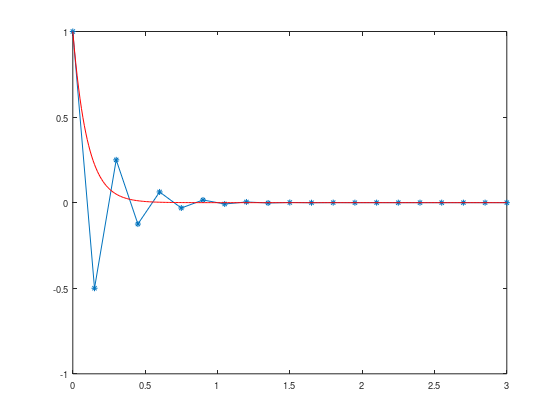

In [6]:
## addpath('./Biblioteca')

clear all;
t0=0;
T=3;
y0=1;
N=20; # Número de particiones
h=T/N;
a=10;
t=t0:h:t0+T;
y=zeros(N+1,1);
y(1)=y0;
true=t0:0.01:t0+T;
 %ztrue=true.^2/2;
 ztrue=exp(-a*true);
for j=1:N
    y(j+1)=y(j)+h*mifun(a,t(j),y(j));
end
figure(1);
plot(t,y,'*-',true,ztrue,'r-');

El archivo *mifun.m* es:

In [5]:
function dydt=mifun(aa,tt,yy)
    dydt=tt;
    dydt=-aa*yy;
    end

# 2) Runge-Kutta

En el código *RK4vsEulerExplicitoOrdenes.m* se muestra la programacion del
método de Runge-Kutta clásico y la del método de Euler explícito. Se obtienen
además las curvas de pendientes de cada uno de los métodos comprobandose así
que el método de Runge-Kutta clásico posee orden 4 mientras que Euler explícito
orden 1. Se aplican ambos al problema

$y'(t) =\lambda \cos (\lambda t)y(t), \quad t\in [0,20]$

$y(0) = y_0$

cuya solución es $y(t) = y_0e^{sin(\lambda t)}$ con $y_0 = 2$ y $\lambda = 7$. Esta solución es oscilante y
necesita precisión para poder ser calculada. Se puede usar *dfield.jar* para observar
el comportamiento del campo de vectores y sus soluciones

Errores: N= 20 Euler = 6000634129.4805 RK4 = 5.43879414190255e+17
Errores: N= 40 Euler = 1735039055204.966 RK4 = 3.030684665484484e+18
Errores: N= 80 Euler = 83438370235.7187 RK4 = 11.9109
Errores: N= 160 Euler = 14.367 RK4 = 5.3221
Errores: N= 320 Euler = 5.434 RK4 = 0.5153
Errores: N= 640 Euler = 5.4364 RK4 = 0.012778
Errores: N= 1280 Euler = 5.433 RK4 = 0.00039374


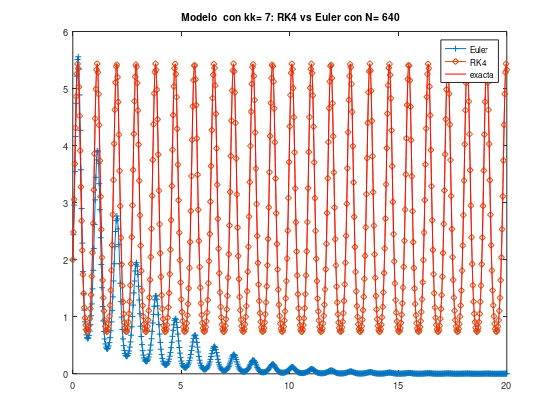

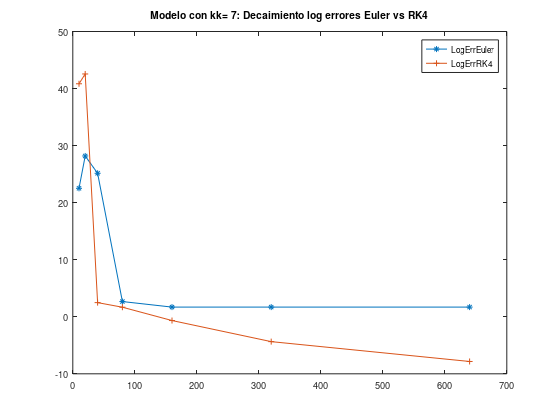

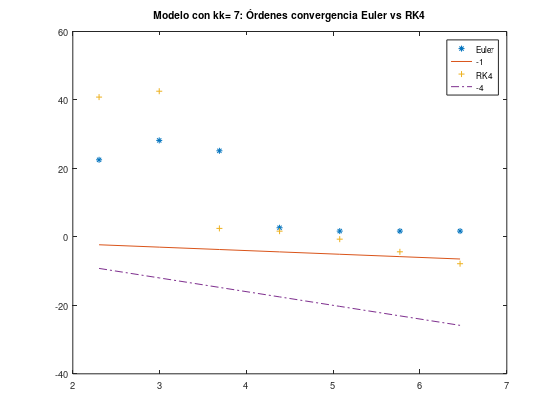

In [12]:
%
% Contrastamos Runge-Kutta de orden 4 con Euler explicito
% estimamos los ordenes 
% de convergencia usando las rectas de pendiente
%

t0=0; %Tiempo inicial
tf=20;  %Tiempo final
T=tf-t0;% Tiempo total
y0=2; %Dato inicial
%Datos para la solucion exacta
kk=7;
% Solucion exacta en una particion fina
ttrue=t0:0.001:t0+T; %Particion fina
ytrue=y0*exp(sin(kk*ttrue));
%
% Numero de calculos a realizar
%
M=7;
nP=zeros(1,M);% guarda el numero de puntos de la particion en cada calculo
errEuler=zeros(1,M); %guarda el error obtenido con Euler
errRK=zeros(1,M); %guarda el error obtenido con RK4
%
% Numero de puntos iniciales
%
N=10;
for j=1:M  
    nP(j)=N;% Se guarda el numero de puntos a usar 
    h=T/N; % Talla de la particion
    t=t0:h:t0+T; %Particion
    h=T/N;% talla de la particion
% Vector para Runge-Kutta orden 4
    yRK=zeros(1,N+1);% dimensionaliza t e y 
    yRK(1)=y0;
% Vector para Euler orden 1
    yEuler=zeros(1,N+1);% dimensionaliza t e y 
    yEuler(1)=y0;
% Solucion exacta en la particion 
    yt=y0*exp(sin(kk*t));

    for n=1:N
        %Calculo RK
        k1=mifun2(kk,t(n),yRK(n));
        k2=mifun2(kk,t(n)+h/2,yRK(n)+h/2*k1);
        k3=mifun2(kk,t(n)+h/2,yRK(n)+h/2*k2);
        k4=mifun2(kk,t(n)+h,yRK(n)+h*k3);
        yRK(n+1)=yRK(n)+h*(k1+2*k2+2*k3+k4)/6;
        %Calculo Euler
        yEuler(n+1)=yEuler(n)+h*mifun2(kk,t(n),yEuler(n));
    end 


figure(1);
plot(t,yEuler,'+-',t,yRK,'d-',ttrue,ytrue,'r-');
legend('Euler','RK4','exacta','Location','Best');
title([' Modelo  con kk= ',num2str(kk),...
       ': RK4 vs Euler con N= ',num2str(N)]);
errEuler(j)=max(abs(yEuler-yt));
errRK(j)=max(abs(yRK-yt));
   pause(0.1); 
N=2*N; %duplicamos N
disp(['Errores: N= ',num2str(N),' Euler = ',num2str(errEuler(j)),...
    ' RK4 = ',num2str(errRK(j))])
pause(0.1);
end



%
% Visualizamos ahora los datos globales del calculo
%
figure(2)
plot(nP,log(errEuler),'-*',nP,log(errRK),'-+');
legend('LogErrEuler','LogErrRK4','Location','Best');
title([' Modelo con kk= ',num2str(kk),...
       ': Decaimiento log errores Euler vs RK4 ']);
       

figure(3)
plot(log(nP),log(errEuler),'*',log(nP),-log(nP),'-',...
    log(nP),log(errRK),'+',log(nP),-4*log(nP),'-.');
legend('Euler','-1','RK4','-4','Location','Best');
title([' Modelo con kk= ',num2str(kk),...
       ': Órdenes convergencia Euler vs RK4 ']);
   

# Ejercicio 3)

Resolución de un sistema lineal 2d usando herramientas matriciales de Matlab o de
Octave. El problema es:

$u' = 9u + 24v +5\cos(t) - \frac{1}{3}\sin(t), \quad u(0) = 4/3$

$v' = -24u -51v -9\cos(t) + \frac{1}{3}\sin(t), \quad v(0) = 2/3$
